# Rheological analysis of chia pudding oscillation behavior

This notebook demonstrates the use of the `pyRheo` library to fit the oscillation behavior of a chia pudding. The experimental data includes angular frequency (`omega`) and the storage modulus (`G_prime`) and loss modulus (`G_double_prime`), which are analyzed using a rheological model. The data is from Isaac Miranda-Valdez's archive.

We import the following libraries:
- `pandas`: For handling the experimental data in tabular format.
- `numpy`: For numerical operations and transformations.
- `matplotlib.pyplot`: For creating dG_prime, G_double_primeiled visualizations of the data and model predictions.
- `pyRheo.oscillation_model.SAOSModel`: To perform rheological model fitting and analysis of the storage modulus (`G_prime`) and loss modulus (`G_double_prime`) data.



In [1]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from pyRheo.oscillation_model import SAOSModel  # For rheological modeling


# Load and inspect rheological data
This cell loads experimental data from a CSV file containing:
- Angular frequency (`omega`) in [rad/s].
- Storage modulus (`G_prime`) in [Pa].
- Storage modulus (`G_double_prime`) in [Pa].
The data is loaded using `pandas` and the first few rows are displayed for verification.


In [2]:
def process_tts_file(input_file, output_file):
    with open(input_file, 'r') as file:
        lines = file.readlines()
    
    # Ignore the first line (metadata)
    data_lines = lines[1:]
    
    # Read the numerical data into a DataFrame
    df = pd.read_csv(
        pd.io.common.StringIO(''.join(data_lines)),
        delim_whitespace=True,
        header=None,
        usecols=[0, 1, 2],  # Select first three columns
        names=["Angular Frequency", "Storage Modulus", "Loss Modulus"]
    )
    
    # Save to CSV
    df.to_csv(output_file, index=False)
    print(f"Processed data saved to {output_file}")

# Example usage
process_tts_file('./data/pi_linear/PI_94.9k_T-35.tts', './data/pi_linear/PI_94.9k_T-35.csv')

Processed data saved to ./data/pi_linear/PI_94.9k_T-35.csv


In [3]:
# Load rheological data from a CSV file
# The file contains shear rate (omega) and viscosity (G_prime, G_double_prime) data.
data = pd.read_csv('./data/pi_linear/PI_94.9k_T-35.csv', delimiter=',', decimal=".")

# Extract shear rate and viscosity as numpy arrays
omega = data['Angular Frequency'].values
G_prime = data['Storage Modulus'].values
G_double_prime = data['Loss Modulus'].values

# Display the first few rows of the data for verification
data.head()


,Angular Frequency,Storage Modulus,Loss Modulus
0,0.000020,43.473876,2226.353732
1,0.000029,91.092179,3207.536419
2,0.000030,85.782825,3279.985054
3,0.000035,105.410399,3825.447045
4,0.000043,177.011200,4690.984107


# Initialize and fit the rheological model
In this cell:
1. The `SAOSModel` class is instantiated with parameters for model fitting:
   - Automatic model selection.
   - Random initial guesses for optimization.
   - 64 guesses for the optimizer to explore.
   - The Powell algorithm for minimization.
2. The model is fitted to the experimental data (`omega`, `G_prime`, and `G_double_prime`).
3. Fitted model parameters and error metrics are displayed.


In [4]:
# Initialize the rheological model with specific fitting parameters
manual_bounds = [
    (1e4, 1e11),       # Example bounds for G
    (1e4, 1e11),       # Example bounds for V
    (1e3, 1e10),       # Example bounds for K
    (1.0, 1.0),        # Example bounds for alpha
    (0.0, 0.49),        # Example bounds for beta
    (0.0, 1.0)        # Example bounds for kappa

    
]

model = SAOSModel(
    model="FractionalZener",                   # Automatically selects the best model
    initial_guesses="random",       # Uses random initial guesses
    num_initial_guesses=100,         # Number of initial guesses for the optimizer
    minimization_algorithm="Powell",  # Optimization algorithm
    bounds=manual_bounds
)

# Fit the model to the experimental data
model.fit(omega, G_prime, G_double_prime)

# Print the fitted parameters and error metrics
model.print_parameters()  # Display model parameters
model.print_error()       # Display error of the fit


Iterations used: 2


/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_model.py:201: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, method=self.minimization_algorithm, bounds=bounds)


Iterations used: 2
Iterations used: 16
Iterations used: 14
Best initial guess was: [272737384.0454226, 1792205763.2021687, 2212090063.329111, 0.6988037071622762, 0.31051134594060203, 0.8045985797242824]
Consider replacing the alpha springpot element with a dashpot.
G: 367175.4869907623
V: 109085009.34469263
K: 24327.2408596609
alpha: 1.0
beta: 0.11192070314861594
kappa: 0.7931902299769339
RSS: 1.2271962378752708
Mean Percentage Error: 4.81%


# Generate and plot model fit
In this cell:
1. Predictions for viscosity are generated using the fitted model at logarithmically spaced shear rates.
2. The experimental data and model predictions are visualized using a quick plot from the `pyRheo` library.


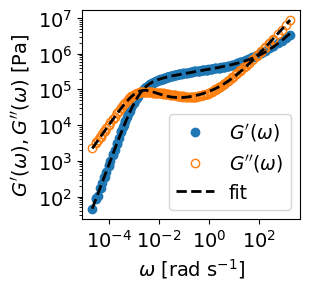

In [5]:
# Generate predictions using the fitted model for a smooth curve
omega_predict = np.logspace(np.min(np.log10(omega)), np.max(np.log10(omega)), 100)
G_prime_predict, G_double_prime_predict = model.predict(omega_predict)

# Plot the experimental data and the model prediction
model.plot(omega, G_prime, G_double_prime, savefig=False)  # Quick overview plot


# Create a customized plot
This cell generates a detailed G_prime, G_double_prime, publication-quality plot:
1. The experimental data and the model predictions are plotted together.
2. Both axes are set to logarithmic scales to represent the data more effectively.
3. Axis labels, legend, and tick font sizes are adjusted for readability.


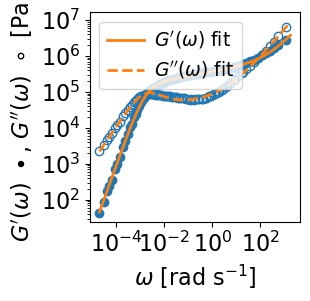

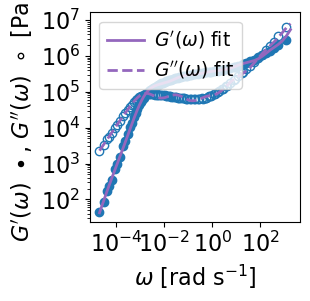

In [6]:
#import scienceplots
#plt.style.use(['science', 'nature', 'bright'])

# Access the color cycle set by scienceplots
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color0 = colors[0 % len(colors)]  # Get color from the cycle
color1 = colors[1 % len(colors)]  # Get color from the cycle
color2 = colors[2 % len(colors)]  # Get color from the cycle
color3 = colors[3 % len(colors)]  # Get color from the cycle
color4 = colors[4 % len(colors)]  # Get color from the cycle
color5 = colors[5 % len(colors)]  # Get color from the cycle
color6 = colors[6 % len(colors)]  # Get color from the cycle


data_rp = pd.read_csv('./data/pi_linear/PI_94.9k_T-35_TH_h.csv', delimiter='\t', decimal=".")

# Extract shear rate and viscosity as numpy arrays
omega_rp = data_rp['Angular Frequency'].values
G_prime_rp = data_rp['Storage Modulus'].values
G_double_prime_rp = data_rp['Loss Modulus'].values



# Create a new figure with adjusted size for better visualization
plt.figure(figsize=(3.2, 3.1))

# Plot experimental data
plt.plot(omega, G_prime, 'o', markersize=6, markevery=2, alpha=1, color=color0)
plt.plot(omega, G_double_prime, 'o', markersize=6, markevery=2, alpha=1, fillstyle='none', color=color0)


# Plot the model predictions
plt.plot(omega_predict, G_prime_predict, '-', color=color1, lw=2, label='$G^{\prime}(\omega)$ fit')
plt.plot(omega_predict, G_double_prime_predict, '--', color=color1, lw=2, label='$G^{\prime \prime}(\omega)$ fit')

#plt.plot(omega_rp, G_prime_rp, '-', lw=2, color=color4, alpha=0.8)
#plt.plot(omega_rp, G_double_prime_rp, '--',  lw=2, color=color4, alpha=0.8)



# Set logarithmic scales for both axes
plt.xscale("log")
plt.yscale("log")

# Customize axis labels, ticks, and font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\omega$ [rad s$^{-1}$]', fontsize=16)
plt.ylabel(r'$G^{\prime}(\omega)~\bullet$, $G^{\prime \prime}(\omega)~\circ$ [Pa]', fontsize=16)

# Add a legend with customized font size
plt.legend(fontsize=13.5, loc="upper left", handletextpad=0.5)

# Final plot adjustments for readability
plt.grid(False)
plt.tight_layout()

# Display the plot
#plt.savefig("mastercurve_ps_fractzener_pyRheo_fit.pdf")
plt.show()


# Create a new figure with adjusted size for better visualization
plt.figure(figsize=(3.2, 3.1))

# Plot experimental data
plt.plot(omega, G_prime, 'o', markersize=6, markevery=2, alpha=1, color=color0)
plt.plot(omega, G_double_prime, 'o', markersize=6, markevery=2, alpha=1, fillstyle='none', color=color0)


# Plot the model predictions
#plt.plot(omega_predict, G_prime_predict, '-', color=color1, lw=2, label='$G^{\prime}(\omega)$ fit')
#plt.plot(omega_predict, G_double_prime_predict, '--', color=color1, lw=2, label='$G^{\prime \prime}(\omega)$ fit')

plt.plot(omega_rp, G_prime_rp, '-', lw=2, color=color4, alpha=1, label='$G^{\prime}(\omega)$ fit')
plt.plot(omega_rp, G_double_prime_rp, '--',  lw=2, color=color4, alpha=1, label='$G^{\prime \prime}(\omega)$ fit' )



# Set logarithmic scales for both axes
plt.xscale("log")
plt.yscale("log")

# Customize axis labels, ticks, and font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\omega$ [rad s$^{-1}$]', fontsize=16)
plt.ylabel(r'$G^{\prime}(\omega)~\bullet$, $G^{\prime \prime}(\omega)~\circ$ [Pa]', fontsize=16)

# Add a legend with customized font size
plt.legend(fontsize=13.5, loc="upper left", handletextpad=0.5)

# Final plot adjustments for readability
plt.grid(False)
plt.tight_layout()

# Display the plot
#plt.savefig("mastercurve_ps_fractzener_reptate_fit.pdf")
plt.show()
